In [2]:
# %%
import pandas as pd
import numpy as np
import pyodbc
import warnings
warnings.filterwarnings("ignore")
from datetime import timedelta
import datetime
from interval3 import Interval, IntervalSet
from tqdm import tqdm
from importlib import reload
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import os

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Users\chiehlinchen\Desktop\msj.ttf',size=14)
# sns.set(font=myfont.get_family(), rc={'figure.figsize':(5,4)}, font_scale= 2)
# sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.facecolor']='whitesmoke'


In [3]:
###################################################
#初始化運行環境

###################################################
import qlib
qlib.init(provider_uri = '~/.qlib/qlib_data/tw_data')

[218860:MainThread](2023-08-16 12:31:22,542) INFO - qlib.Initialization - [config.py:416] - default_conf: client.
[218860:MainThread](2023-08-16 12:31:23,096) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[218860:MainThread](2023-08-16 12:31:23,097) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': WindowsPath('C:/Users/chiehlinchen/.qlib/qlib_data/tw_data')}


In [4]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

import numpy as np

import pandas as pd
import pickle
from pathlib import Path

import qlib
import yaml

from qlib.config import REG_TW
from qlib.contrib.model.xgboost import XGBModel
from qlib.contrib.data.handler import Alpha158
from qlib.contrib.data.handler import Alpha360
from qlib.contrib.strategy.signal_strategy import TopkDropoutStrategy
from qlib.contrib.evaluate import (
        backtest_daily as normal_backtest,
        risk_analysis)
from qlib.contrib.model.gbdt import LGBModel
from qlib.contrib.meta.data_selection.model import MetaModelDS
from qlib.contrib.meta.data_selection.dataset import InternalData, MetaDatasetDS

from qlib.data import D
from qlib.data.filter import NameDFilter, ExpressionDFilter
import sys

from qlib.model.ens.ensemble import RollingEnsemble
from qlib.model.trainer import TrainerR,TrainerRM
from qlib.model.trainer import Trainer

from qlib.tests.data import GetData

from qlib.utils import init_instance_by_config
from qlib.utils import flatten_dict
from qlib.utils import exists_qlib_data, init_instance_by_config
from qlib.utils import flatten_dict

from qlib.workflow.task.utils import TimeAdjuster
from qlib.workflow import R
from qlib.workflow.task.gen import task_generator, RollingGen
from qlib.workflow.task.collect import RecorderCollector
from qlib.workflow.record_temp import PortAnaRecord, SigAnaRecord,SignalRecord


import time

# DIRNAME = Path(r"C:\Users\chiehlinchen\AppData\Local\Programs\Python\Python38\Lib\site-packages\qlib-main\examples\benchmarks_dynamic\DDG-DA\workflow.py").absolute().resolve().parent
# sys.path.append(str(DIRNAME.parent / "baseline"))
# from rolling_benchmark import RollingBenchmark  # NOTE: sys.path is changed for import RollingBenchmark
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r"\\192.168.1.230\新金部\07個人\ChiehLin\字體\msj.ttf",size=14)
# sns.set(font=myfont.get_family(), rc={'figure.figsize':(5,4)}, font_scale= 2)
# sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.facecolor']='whitesmoke'
import plotly.express as px
import pyodbc
from datetime import timedelta
import warnings 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from qlib.contrib.report import analysis_model, analysis_position
from qlib.data import D


ModuleNotFoundError. CatBoostModel are skipped. (optional: maybe installing CatBoostModel can fix it.)


In [5]:
from qlib.contrib.report import analysis_model, analysis_position
from qlib.data import D
recorder = R.get_recorder(experiment_name='b_t_inday_test')
pred_df = recorder.load_object("pred.pkl")
pred_df_datas = pred_df.index.get_level_values(level = 'datetime')
report_normal_df = recorder.load_object("portfolio_analysis/report_normal_1day.pkl")
report_normal_df = report_normal_df.dropna(axis = 0)
position = recorder.load_object("portfolio_analysis/positions_normal_1day.pkl")
analysis_df = recorder.load_object("portfolio_analysis/port_analysis_1day.pkl")
label_df = recorder.load_object("label.pkl")
label_df.columns = ['label']
pred_label = pd.concat([label_df,pred_df],axis = 1,sort = True).reindex(label_df.index)

[218860:MainThread](2023-08-16 12:31:27,712) WARNING - qlib.workflow - [exp.py:308] - Please make sure the recorder name mlflow_recorder is unique, we will only return the latest recorder if there exist several matched the given name.


In [10]:
pred_label = pred_label.reset_index(drop =  False)

**<font  size=5>原始分配</font>**

**<font  size=4>開盤進，9:20出，做多單(加成本)</font>**

<Axes: ylabel='Frequency'>

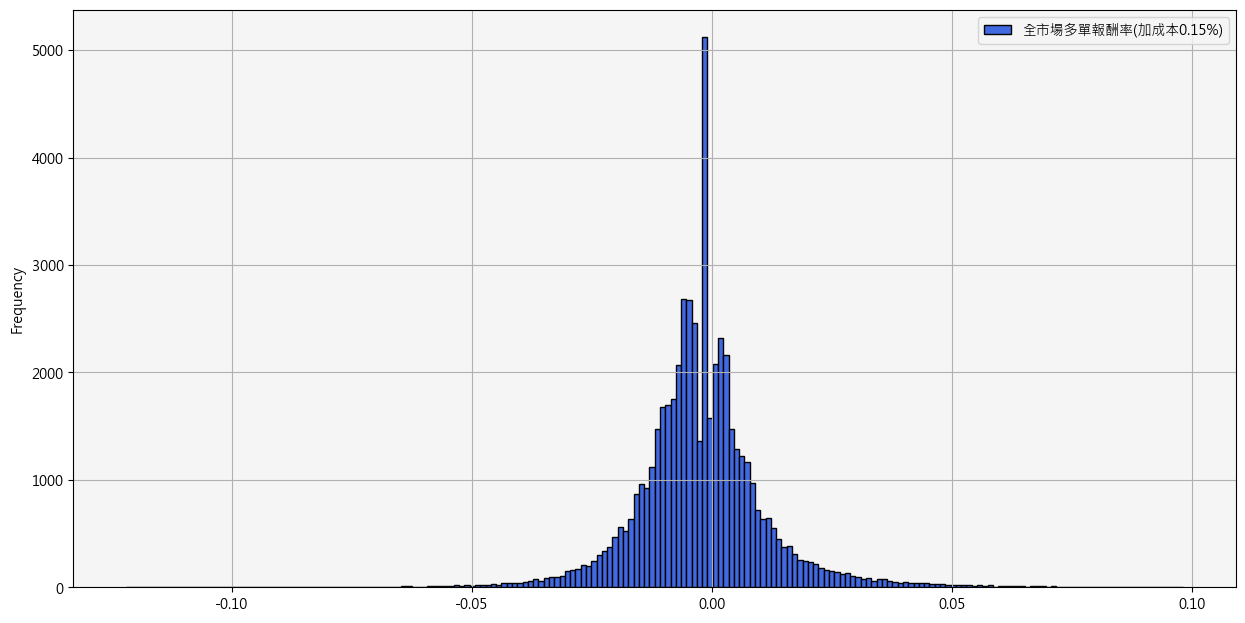

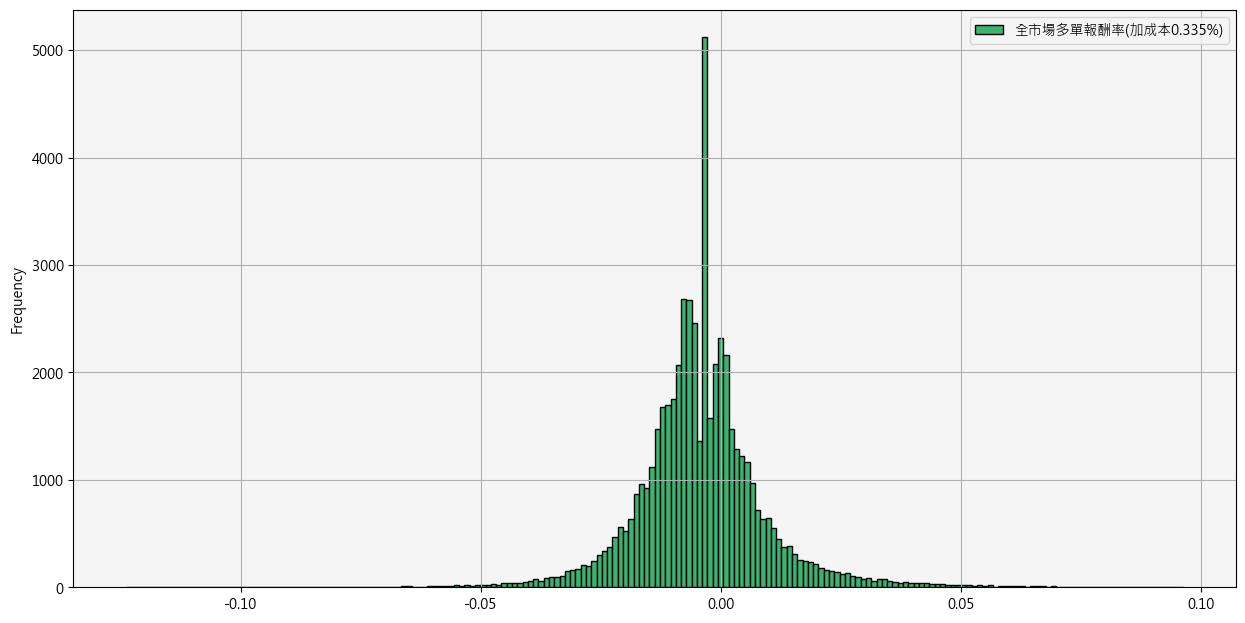

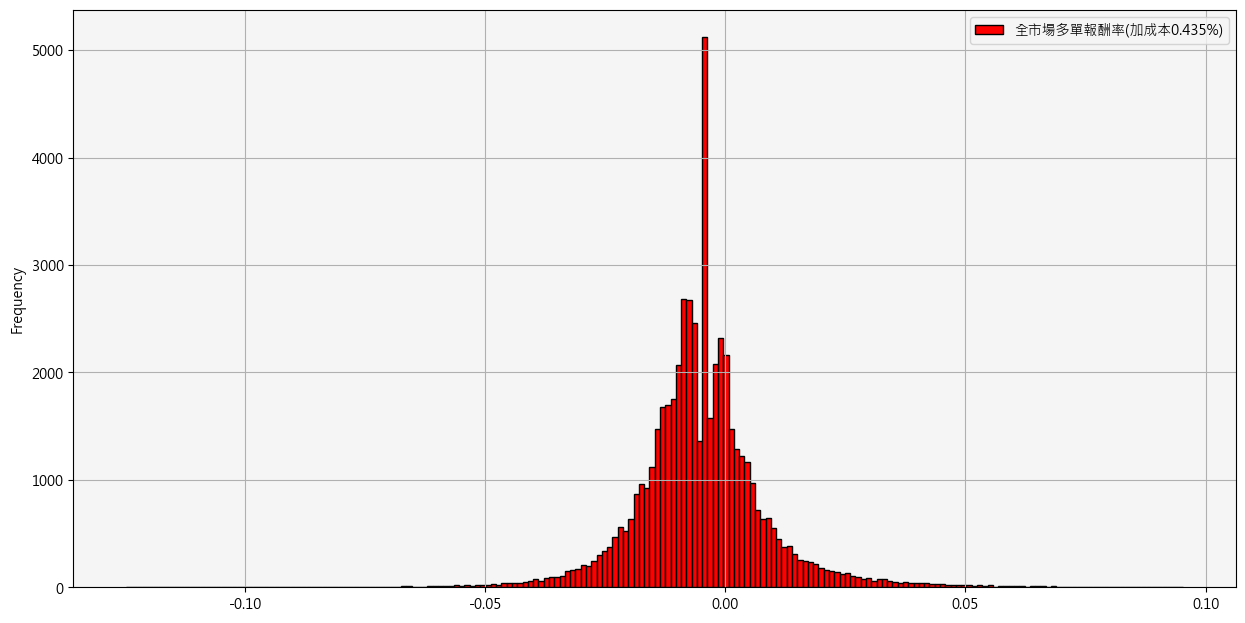

In [22]:
############################################################################################
#每日每股損益分配
#全市場
############################################################################################
pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.0015).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.15%)'})[['全市場多單報酬率(加成本0.15%)']].plot.hist(edgecolor='black',facecolor = 'royalblue',figsize = (15,7.5),bins=200,grid = True)
pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.00335).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.335%)'})[['全市場多單報酬率(加成本0.335%)']].plot.hist(edgecolor='black',facecolor = 'mediumseagreen',figsize = (15,7.5),bins=200,grid = True)
pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.00435).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.435%)'})[['全市場多單報酬率(加成本0.435%)']].plot.hist(edgecolor='black',facecolor = 'red',figsize = (15,7.5),bins=200,grid = True)

In [30]:
pd.concat([pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.0015).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.15%)'})[['全市場多單報酬率(加成本0.15%)']],pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.00335).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.335%)'})[['全市場多單報酬率(加成本0.335%)']],pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.00435).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.435%)'})[['全市場多單報酬率(加成本0.435%)']]],axis = 1).describe().iloc[1:,:]

,全市場多單報酬率(加成本0.15%),全市場多單報酬率(加成本0.335%),全市場多單報酬率(加成本0.435%)
mean,-0.002196,-0.004046,-0.005046
std,0.014020,0.014020,0.014020
min,-0.121955,-0.123805,-0.124805
25%,-0.009036,-0.010886,-0.011886
50%,-0.002593,-0.004443,-0.005443
75%,0.003500,0.001650,0.000650
max,0.098168,0.096318,0.095318


<Axes: ylabel='Frequency'>

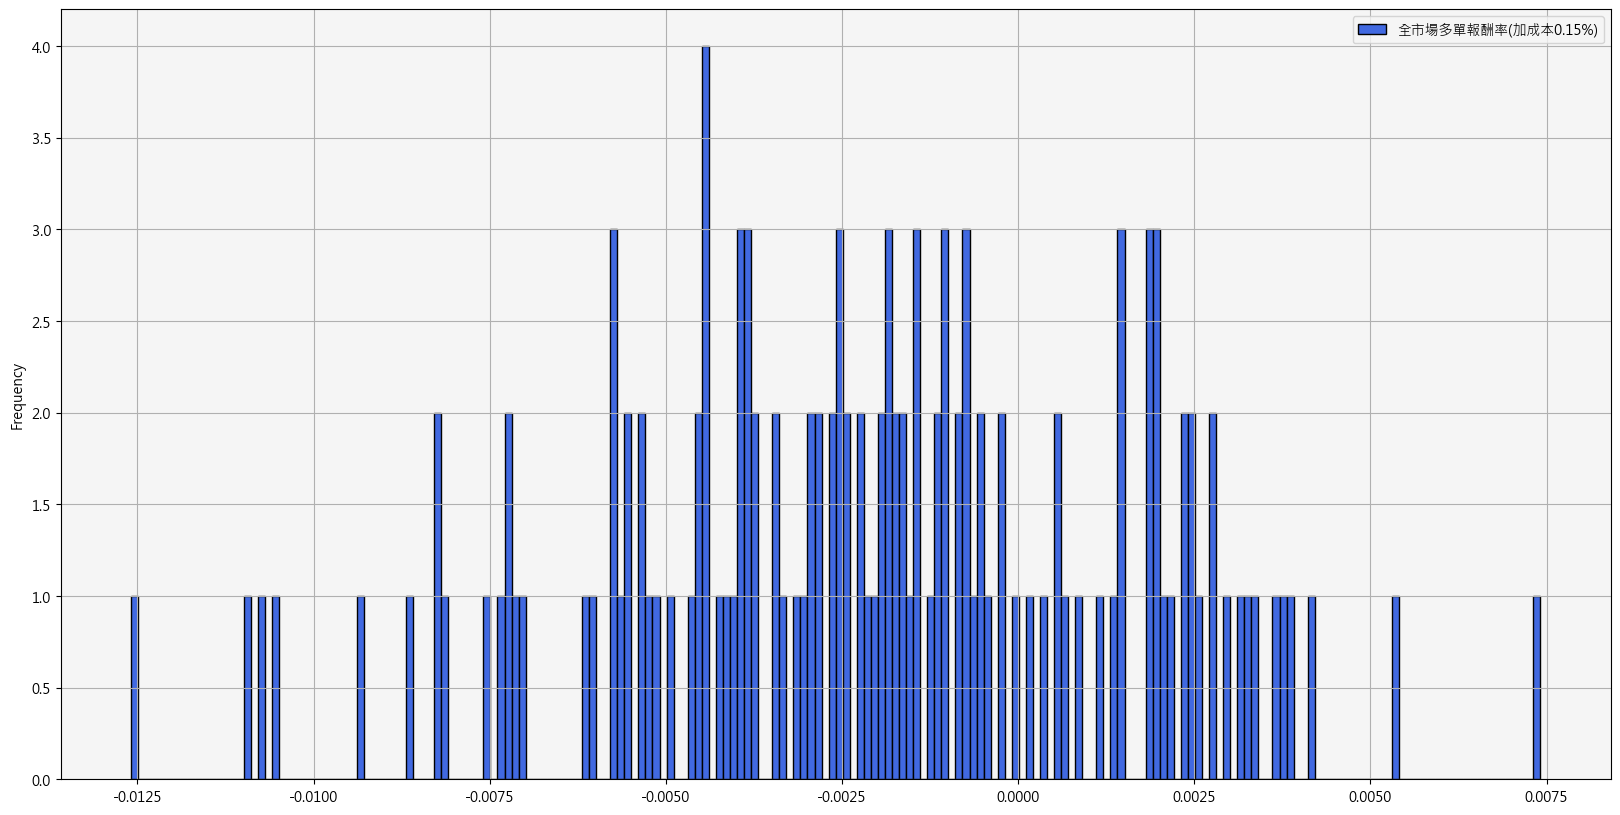

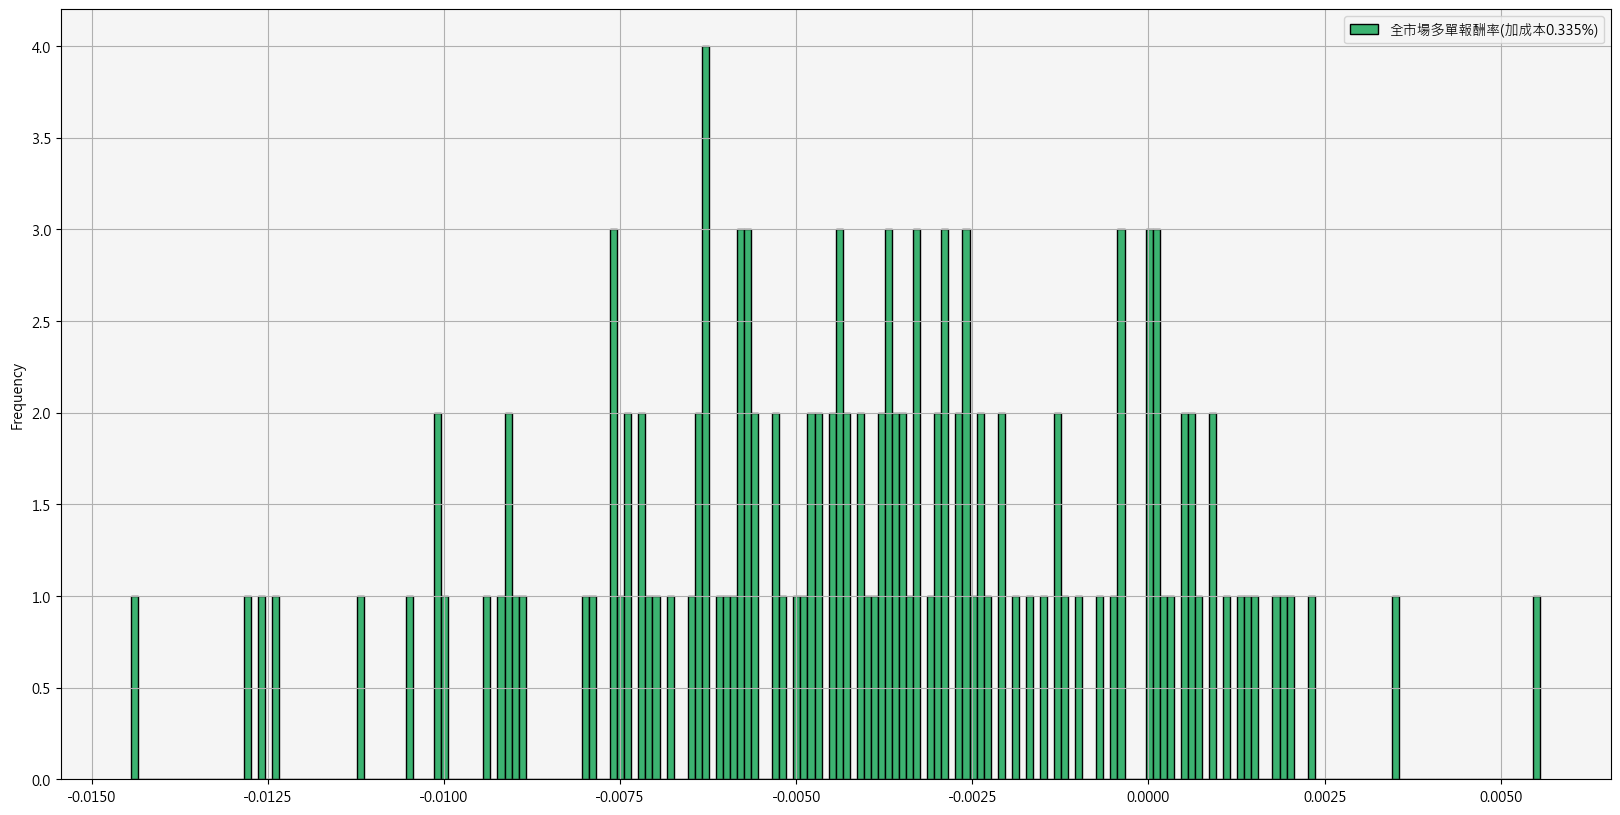

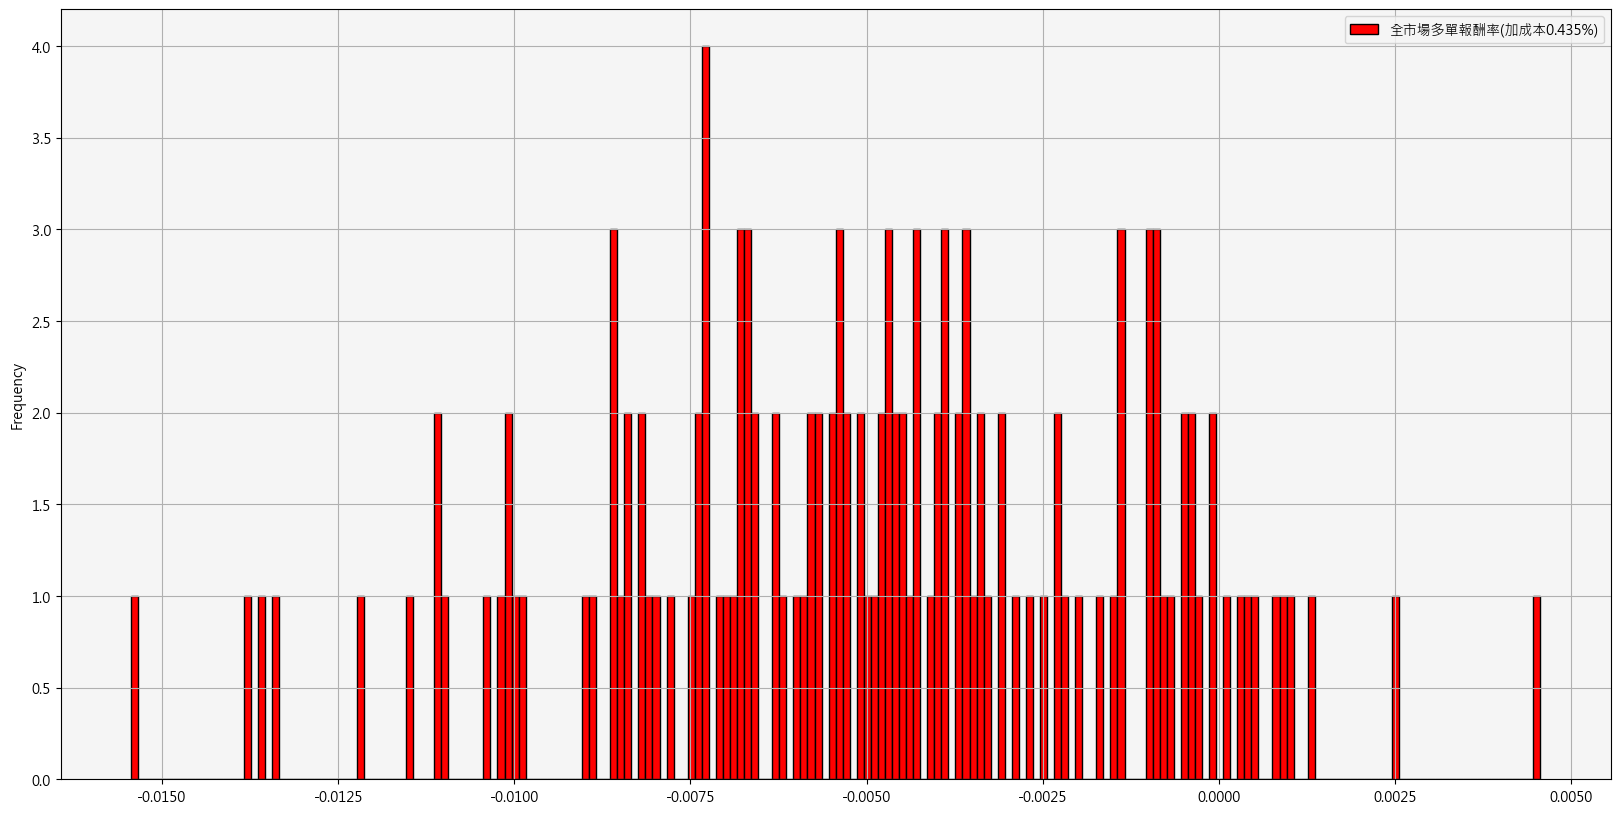

In [38]:
(pred_label.groupby('datetime')[['label']].mean()-0.0015).rename(columns = {'label':'全市場多單報酬率(加成本0.15%)'}).plot.hist(edgecolor='black',figsize = (20,10), facecolor = 'royalblue',bins=200,grid = True)
(pred_label.groupby('datetime')[['label']].mean()-0.00335).rename(columns = {'label':'全市場多單報酬率(加成本0.335%)'}).plot.hist(edgecolor='black', facecolor = 'mediumseagreen', figsize = (20,10),bins=200,grid = True)
(pred_label.groupby('datetime')[['label']].mean()-0.00435).rename(columns = {'label':'全市場多單報酬率(加成本0.435%)'}).plot.hist(edgecolor='black', facecolor = 'red' ,figsize = (20,10),bins=200,grid = True)


In [42]:
pd.concat([(pred_label.groupby('datetime')[['label']].mean()-0.0015).rename(columns = {'label':'全市場多單報酬率(加成本0.15%)'}),(pred_label.groupby('datetime')[['label']].mean()-0.00335).rename(columns = {'label':'全市場多單報酬率(加成本0.335%)'}),(pred_label.groupby('datetime')[['label']].mean()-0.00435).rename(columns = {'label':'全市場多單報酬率(加成本0.435%)'})],axis = 1).describe().iloc[1:,:]

,全市場多單報酬率(加成本0.15%),全市場多單報酬率(加成本0.335%),全市場多單報酬率(加成本0.435%)
mean,-0.002126,-0.003976,-0.004976
std,0.003658,0.003658,0.003658
min,-0.012589,-0.014439,-0.015439
25%,-0.004421,-0.006271,-0.007271
50%,-0.001982,-0.003832,-0.004832
75%,0.000530,-0.001320,-0.002320
max,0.007410,0.005560,0.004560


<Axes: xlabel='datetime'>

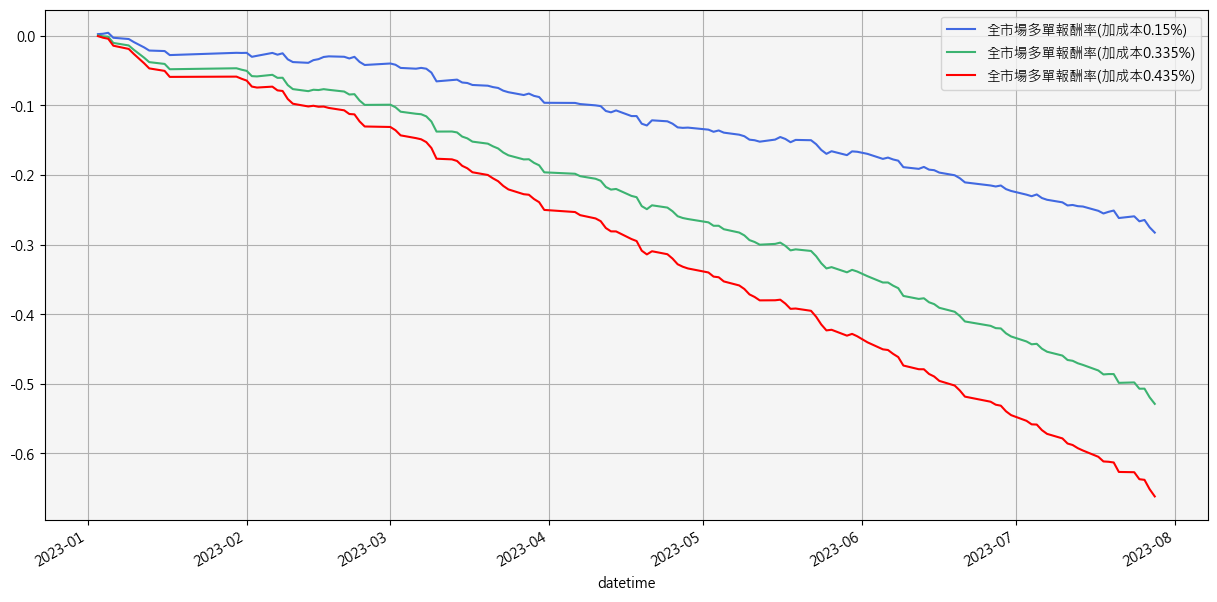

In [47]:
pd.concat([(pred_label.groupby('datetime')[['label']].mean()-0.0015).rename(columns = {'label':'全市場多單報酬率(加成本0.15%)'}),(pred_label.groupby('datetime')[['label']].mean()-0.00335).rename(columns = {'label':'全市場多單報酬率(加成本0.335%)'}),(pred_label.groupby('datetime')[['label']].mean()-0.00435).rename(columns = {'label':'全市場多單報酬率(加成本0.435%)'})],axis = 1).cumsum().plot(figsize=(15, 7.5),color = ['royalblue','mediumseagreen','red'],grid = True)

**<font  size=5>選股後模型損益</font>**

In [55]:
pred_label = pred_label.sort_values(by = ['datetime','score'],ascending = [True,False]).groupby('datetime').head(5).reset_index(drop = True)

**<font  size=4>開盤進，9:20出，做多單(加成本)</font>**

<Axes: ylabel='Frequency'>

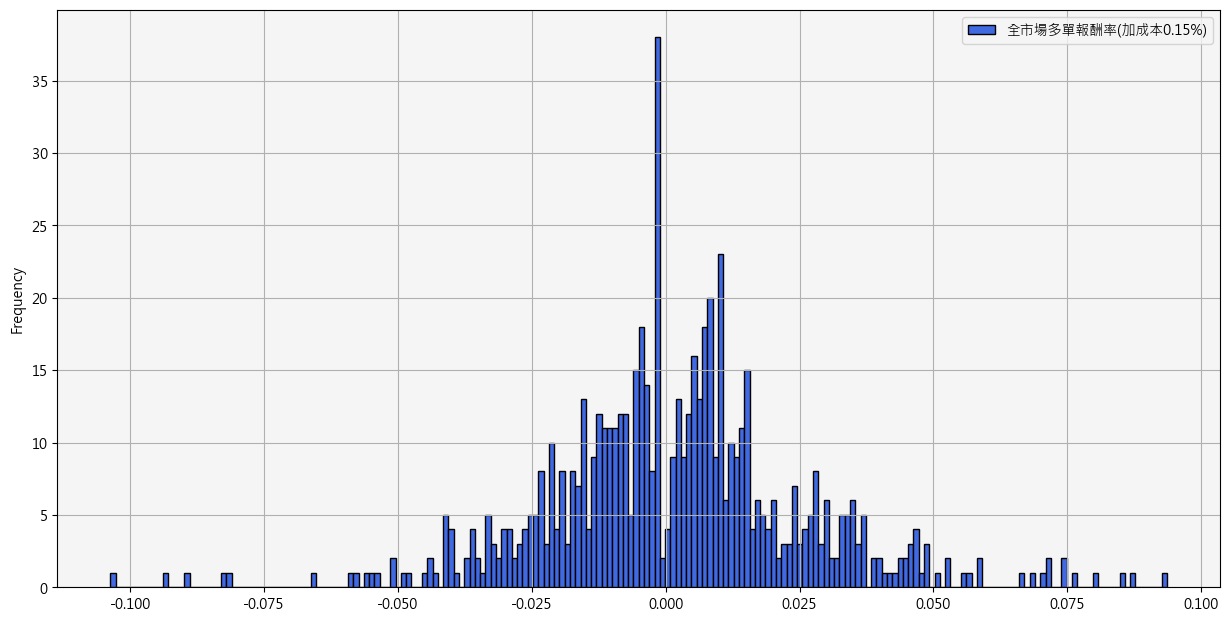

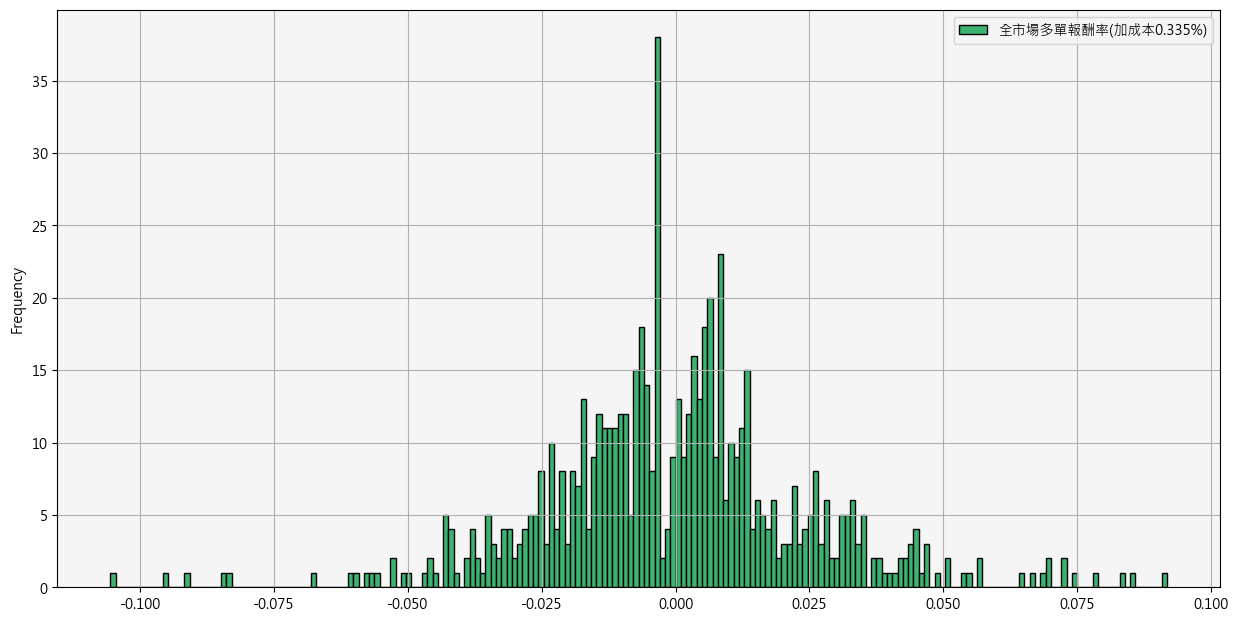

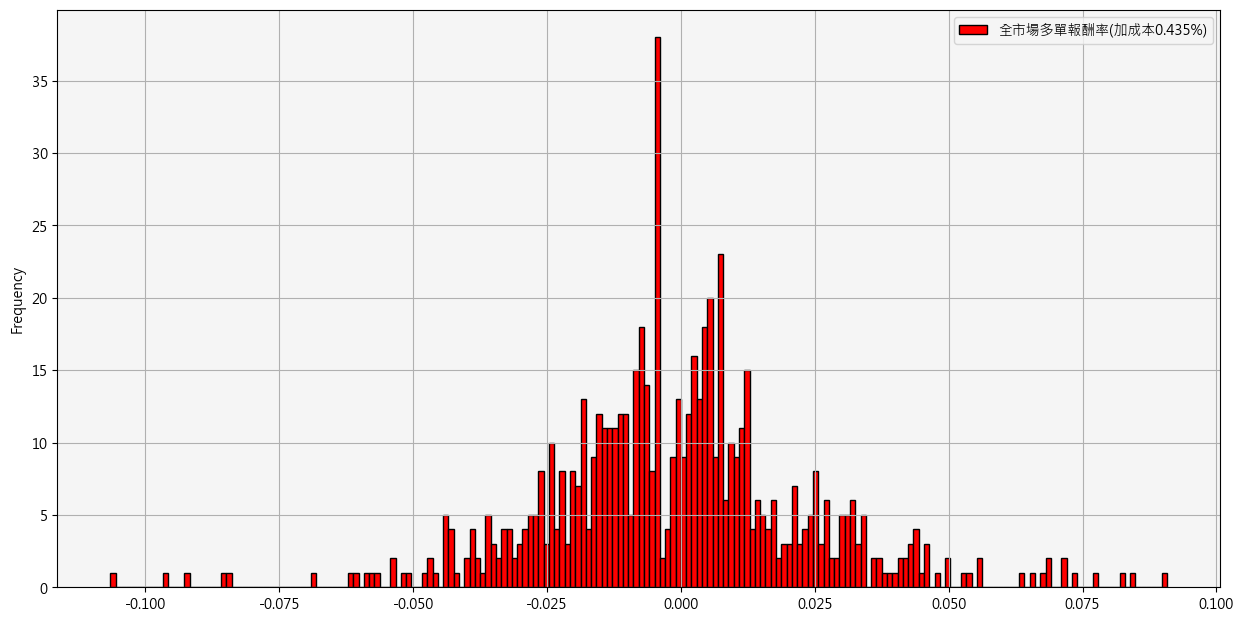

In [56]:
############################################################################################
#每日每股損益分配
#全市場
############################################################################################
pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.0015).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.15%)'})[['全市場多單報酬率(加成本0.15%)']].plot.hist(edgecolor='black',facecolor = 'royalblue',figsize = (15,7.5),bins=200,grid = True)
pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.00335).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.335%)'})[['全市場多單報酬率(加成本0.335%)']].plot.hist(edgecolor='black',facecolor = 'mediumseagreen',figsize = (15,7.5),bins=200,grid = True)
pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.00435).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.435%)'})[['全市場多單報酬率(加成本0.435%)']].plot.hist(edgecolor='black',facecolor = 'red',figsize = (15,7.5),bins=200,grid = True)

In [57]:
pd.concat([pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.0015).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.15%)'})[['全市場多單報酬率(加成本0.15%)']],pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.00335).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.335%)'})[['全市場多單報酬率(加成本0.335%)']],pred_label.rename(columns = {'label':'全市場多單報酬率'}).assign(全市場多單報酬率 = pred_label.rename(columns = {'label':'全市場多單報酬率'})['全市場多單報酬率']-0.00435).rename(columns = {'全市場多單報酬率':'全市場多單報酬率(加成本0.435%)'})[['全市場多單報酬率(加成本0.435%)']]],axis = 1).describe().iloc[1:,:]

,全市場多單報酬率(加成本0.15%),全市場多單報酬率(加成本0.335%),全市場多單報酬率(加成本0.435%)
mean,0.001678,-0.000172,-0.001172
std,0.024528,0.024528,0.024528
min,-0.103722,-0.105572,-0.106572
25%,-0.011963,-0.013813,-0.014813
50%,0.001436,-0.000414,-0.001414
75%,0.013649,0.011799,0.010799
max,0.093637,0.091787,0.090787


<Axes: ylabel='Frequency'>

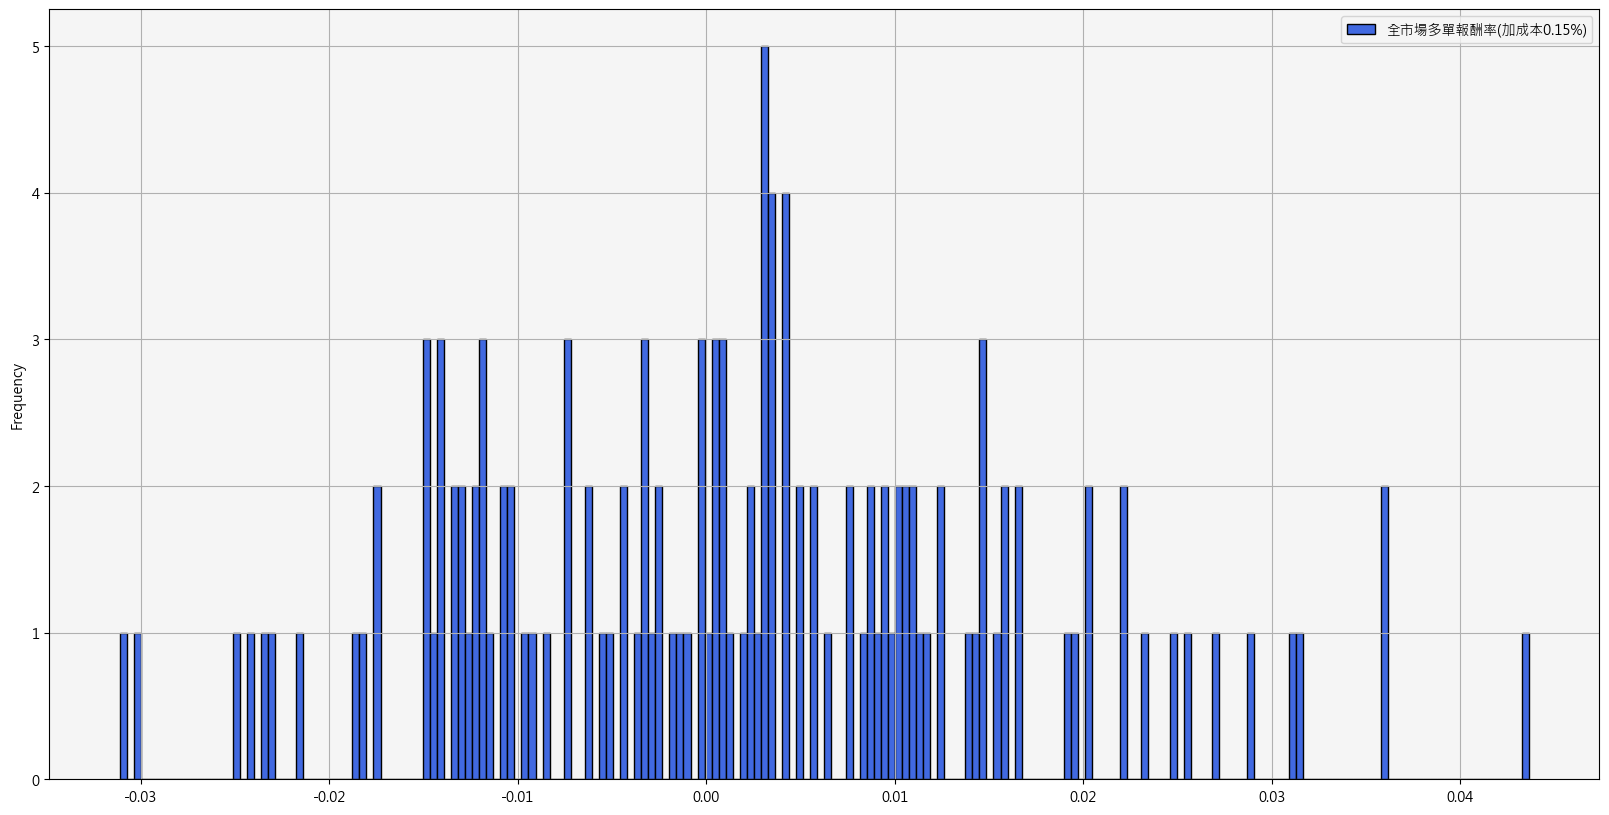

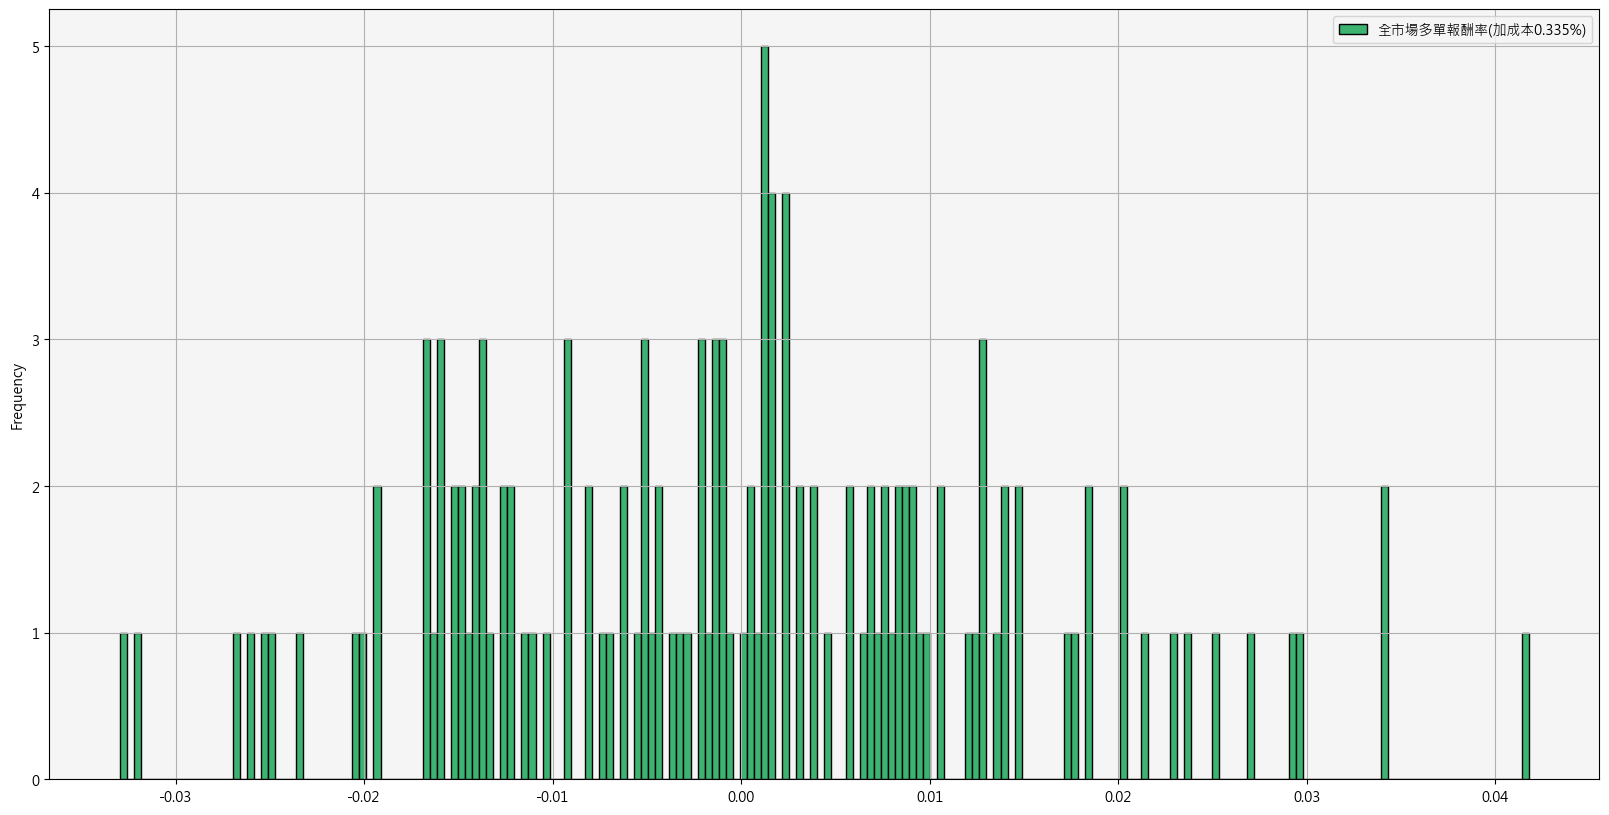

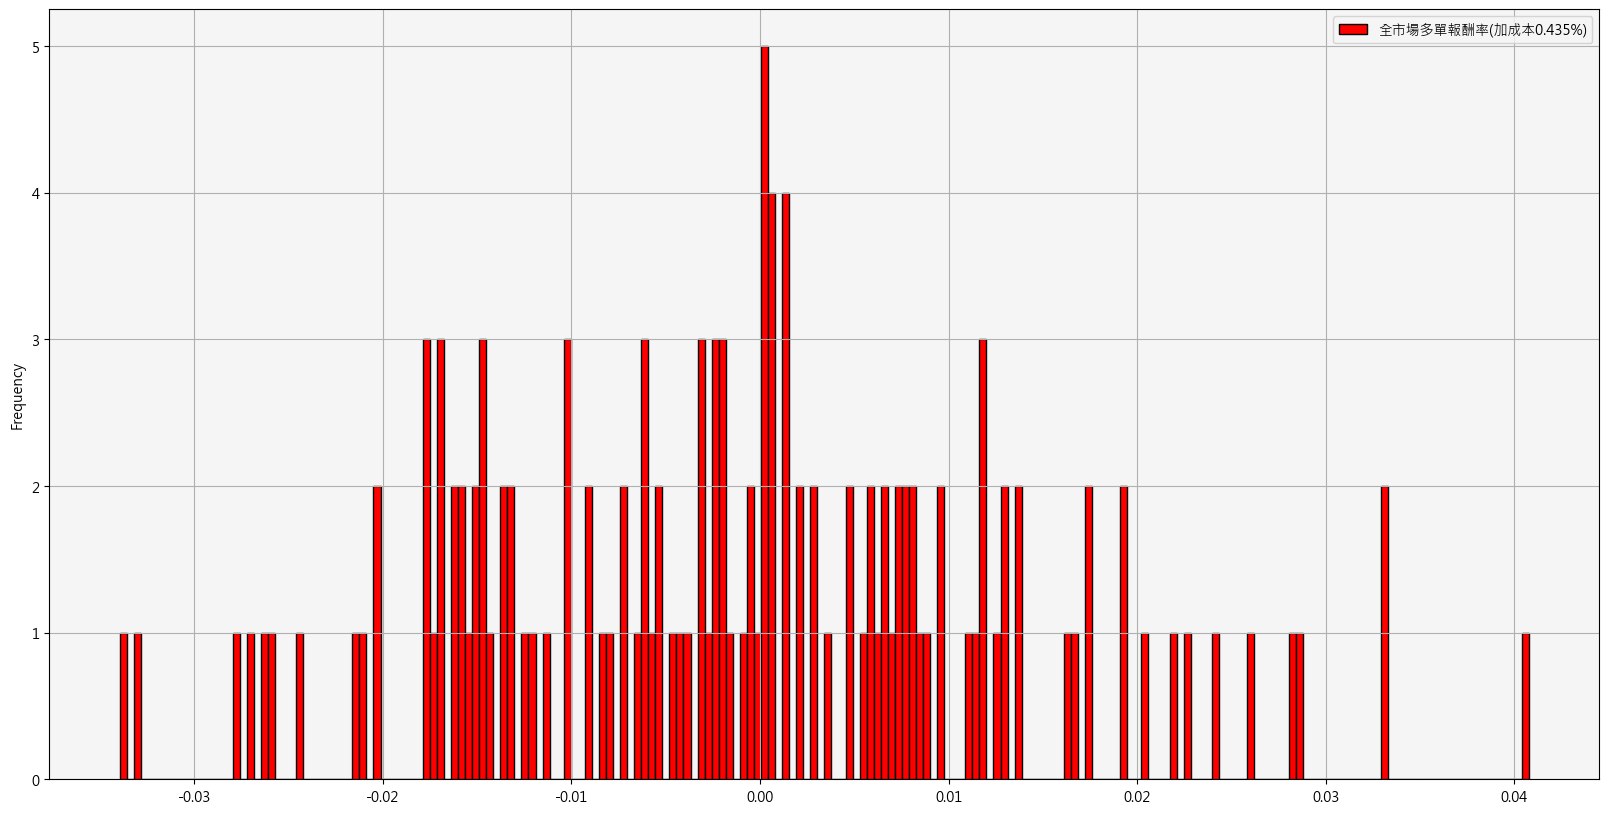

In [58]:
(pred_label.groupby('datetime')[['label']].mean()-0.0015).rename(columns = {'label':'全市場多單報酬率(加成本0.15%)'}).plot.hist(edgecolor='black',figsize = (20,10), facecolor = 'royalblue',bins=200,grid = True)
(pred_label.groupby('datetime')[['label']].mean()-0.00335).rename(columns = {'label':'全市場多單報酬率(加成本0.335%)'}).plot.hist(edgecolor='black', facecolor = 'mediumseagreen', figsize = (20,10),bins=200,grid = True)
(pred_label.groupby('datetime')[['label']].mean()-0.00435).rename(columns = {'label':'全市場多單報酬率(加成本0.435%)'}).plot.hist(edgecolor='black', facecolor = 'red' ,figsize = (20,10),bins=200,grid = True)


In [59]:
pd.concat([(pred_label.groupby('datetime')[['label']].mean()-0.0015).rename(columns = {'label':'全市場多單報酬率(加成本0.15%)'}),(pred_label.groupby('datetime')[['label']].mean()-0.00335).rename(columns = {'label':'全市場多單報酬率(加成本0.335%)'}),(pred_label.groupby('datetime')[['label']].mean()-0.00435).rename(columns = {'label':'全市場多單報酬率(加成本0.435%)'})],axis = 1).describe().iloc[1:,:]

,全市場多單報酬率(加成本0.15%),全市場多單報酬率(加成本0.335%),全市場多單報酬率(加成本0.435%)
mean,0.001675,-0.000175,-0.001175
std,0.014242,0.014242,0.014242
min,-0.031103,-0.032953,-0.033953
25%,-0.009484,-0.011334,-0.012334
50%,0.002033,0.000183,-0.000817
75%,0.010463,0.008613,0.007613
max,0.043633,0.041783,0.040783


<Axes: xlabel='datetime'>

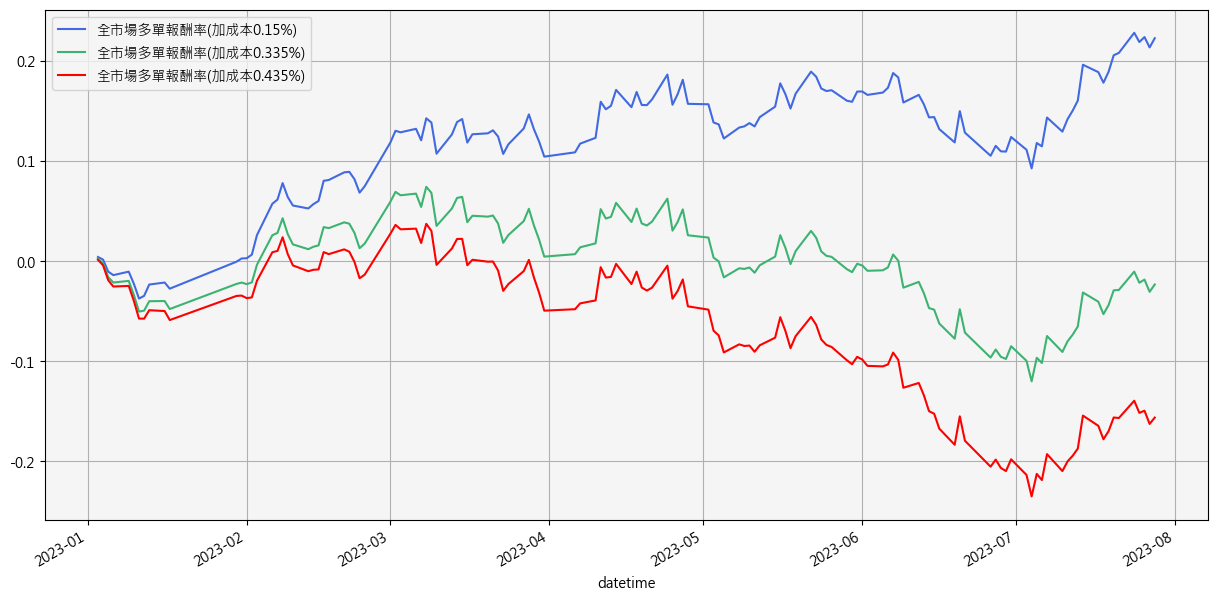

In [60]:
pd.concat([(pred_label.groupby('datetime')[['label']].mean()-0.0015).rename(columns = {'label':'全市場多單報酬率(加成本0.15%)'}),(pred_label.groupby('datetime')[['label']].mean()-0.00335).rename(columns = {'label':'全市場多單報酬率(加成本0.335%)'}),(pred_label.groupby('datetime')[['label']].mean()-0.00435).rename(columns = {'label':'全市場多單報酬率(加成本0.435%)'})],axis = 1).cumsum().plot(figsize=(15, 7.5),color = ['royalblue','mediumseagreen','red'],grid = True)